# Neural ODE example notebook

Load packages/functionality from nODE and training

In [1]:
import torch
import numpy as np
from models.training import easyTrainer, weights_to_dataset
from models.nODE import nODE, make_nODE_from_parameters
import matplotlib.pyplot as plt
device = 'cpu'#torch.device('cuda' if torch.cuda.is_available() else 'cpu')''

c:\Users\Lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generate toggle switch dataset based on parameters

Plot phase portrait based on current nODE parameters..


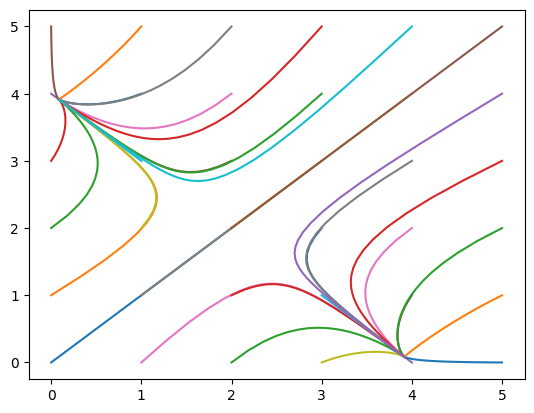

In [23]:
ODE_dim = 2
Gamma = np.array([-1., -1.])
integration_time = 1
Win = np.array([[0, -1.], [-1., 0]])
Wout = np.array([[2., 0], [0, 2.]])
bin = np.array([[2.], [2.]])
bout = np.array([[2.], [2.]])

train_data, test_data = weights_to_dataset(integration_time, Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout, batch_size = 10)

true_model = make_nODE_from_parameters(Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)

true_model.phase_portrait(gridpoints=5, time_interval=[0.,10.])

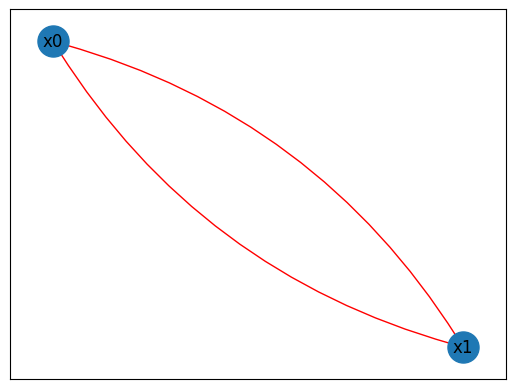

both
Gx + w1tanh(w2x(t)+b2)+b1    over the interval [0, 1]
G = [-0.9086958 -1.3091625], W1 = [[-1.1166543 -1.4678317]
 [ 2.6637726 -2.158054 ]],        b1 = [2.087972  2.1673992]

W2= [[-0.38746804  0.6850406 ]
 [ 0.39233243  0.7195907 ]],        b2 = [-0.33349356 -2.1719666 ]




In [24]:
node = nODE(ODE_dim, architecture='both', time_interval=[0, integration_time])

optimizer_node = torch.optim.Adam(node.parameters(), lr=1e-1)

trainer = easyTrainer(node, optimizer_node, device, verbose=0)

trainer.train(train_data, 400)

node.plot()
print(node)

Plot phase portrait based on current nODE parameters..


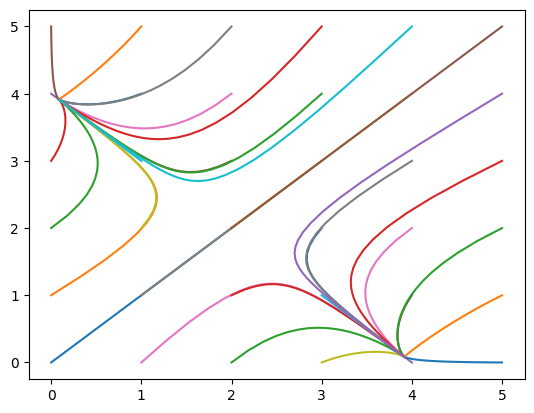

In [25]:
true_model.phase_portrait(gridpoints=5, time_interval=[0.,10.])

Generate repressilator dataset based on parameters

Plot phase portrait based on current nODE parameters..


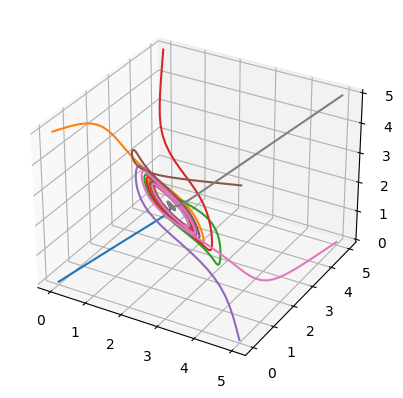

In [38]:
ODE_dim = 3
Gamma = np.array([-1., -1., -1.])
integration_time = 1
Win = np.array([[0, 0, -1.], [-1., 0, 0], [0,-1.,0]])
Wout = np.array([[2., 0, 0], [0, 2., 0], [0,0,2.]])
bin = np.array([[2.], [2.], [2.]])
bout = np.array([[2.2], [2.], [2.]])

train_data, test_data = weights_to_dataset(integration_time, Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout, batch_size = 200)

true_model = make_nODE_from_parameters(Gamma, Win=Win, bin=bin, Wout=Wout, bout=bout)

true_model.phase_portrait(dim3=2, gridpoints=1, time_interval=[0.,10.])

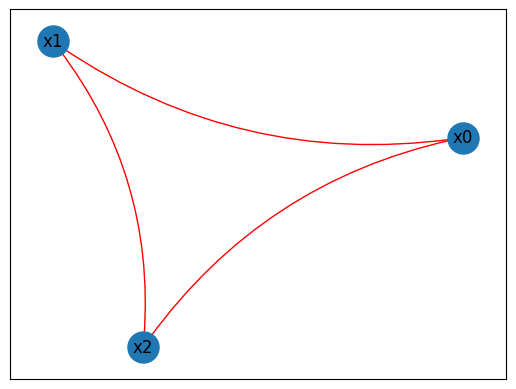

both
Gx + w1tanh(w2x(t)+b2)+b1    over the interval [0, 1]
G = [-0.9686669 -1.0260795 -0.8976581], W1 = [[ 0.03663691 -0.01795674 -1.9046521 ]
 [ 0.02423283 -2.0692425  -0.06210946]
 [-2.0158343  -0.011309   -0.15550955]],        b1 = [2.1252215 2.085569  1.8038702]

W2= [[-0.01289766  0.9596559   0.00218963]
 [ 0.90802705 -0.02724445 -0.05368864]
 [ 0.00575368  0.00692268  1.0604305 ]],        b2 = [-1.8660442 -1.6455162 -2.1609564]




In [39]:
node = nODE(ODE_dim, architecture='both', time_interval=[0, integration_time])

optimizer_node = torch.optim.Adam(node.parameters(), lr=1e-1)

trainer = easyTrainer(node, optimizer_node, device, verbose=0)

trainer.train(train_data, 400)

node.plot()
print(node)

Plot phase portrait based on current nODE parameters..


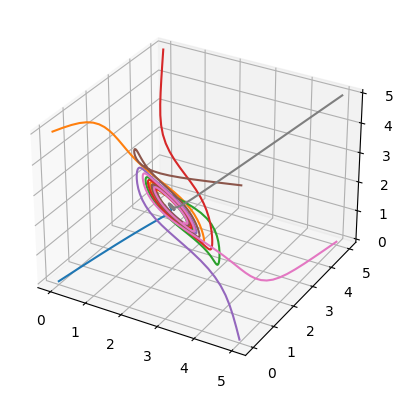

In [40]:
node.phase_portrait(dim3=2, gridpoints=1, time_interval=[0.,10.])